In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#softmax function
#softmax is not binary it is case by case

In [22]:
#turning math functions into python functions

def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h),axis=1)).T

def  cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0) 

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

# 1 hot encoder
def indieces_to_one_hot(data,nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]





In [24]:
class MV_Logistic_Regression():

  def __init__(self, thresh=0.5):
    self.thresh = thresh

  def fit(self,X,y,eta=2e-1,epochs = 1e3, show_curve=False):
    epochs = int(epochs)
    N,D = X.shape
    K = len(np.unique(y))
    y_values = np.unique(y,return_index=False)
    Y = indieces_to_one_hot(y,K).astype(int)
    self.W = np.random.randn(D,K)
    self.B = np.random.randn(N,K)

    J = np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y,P_hat)
      self.W -= eta*((1/N)*X.T@(P_hat - Y))
      self.B -= eta*((1/N)*np.sum(P_hat - Y,axis = 0))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def __forward__(self,X):
    return softmax(X@self.W + self.B)

  def predict(self,X):
    return np.argmax(self.__forward__(X),axis=1)


  


In [25]:
data = pd.read_csv("sample_data/TrippleGauss.csv",header=0)
data.head()
X = data.to_numpy()

In [26]:
Y = data['2'].to_numpy()
X = data[["0",'1']].to_numpy()


In [27]:
logreg = MV_Logistic_Regression()


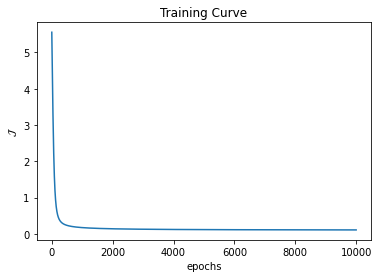

In [46]:
logreg.fit(X,Y,show_curve=True,eta=1e-2,epochs=1e4)

In [47]:
y_hat = logreg.predict(X)

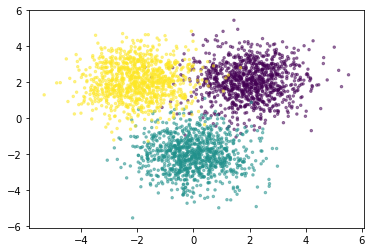

In [48]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y,alpha=.5,s=6)

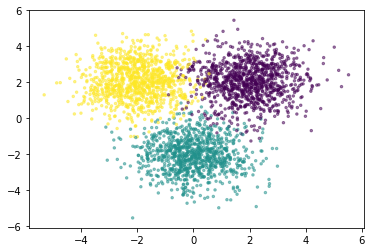

In [49]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y_hat,alpha=.5,s=6)

In [50]:
accuracy(Y,y_hat)

0.9583333333333334